In [1]:
# Standard libraries
import math
import torch
import gpytorch
import numpy as np
from matplotlib import pyplot as plt

# Import custom modules
from function import FunctionUtils
from nd_model import ExactGPModel
from data import generate_nd_data
from normalize_data import normalize_data
from training import GPTrainer
from optimizer import OptimizerHandler
from visualizer import Visualizer
from main import MainRunner


--- Training 1D model ---
1D Metrics:
  MSE  = 0.0000
  NMSE = 0.0046
  MNLP = -7.0028


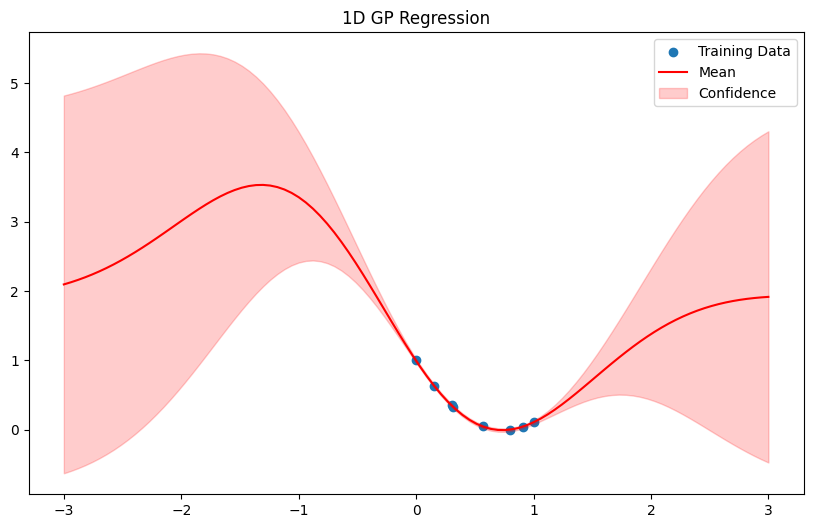


--- Training 2D model ---
2D Metrics:
  MSE  = 0.0044
  NMSE = 1.3443
  MNLP = -4.2030


d:\python\Lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


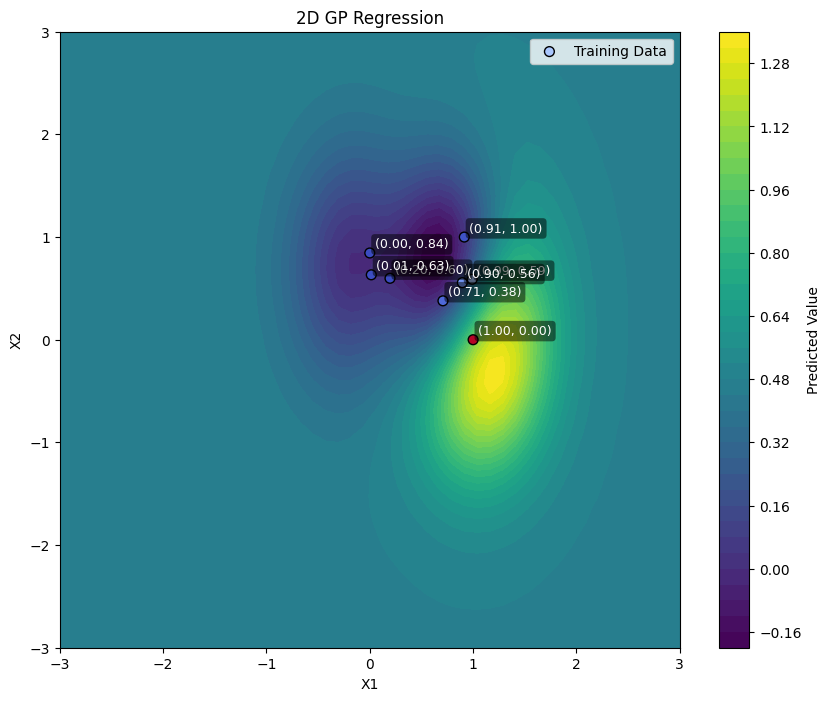


--- Training 3D model ---
3D Metrics:
  MSE  = 1.0166
  NMSE = 316.0207
  MNLP = 8.6159

--- Training 4D model ---
4D Metrics:
  MSE  = 0.0128
  NMSE = 1.4786
  MNLP = 33.8719

--- Training 5D model ---
5D Metrics:
  MSE  = 0.1002
  NMSE = 0.4526
  MNLP = 3.9064

=== Summary Metrics for 1D to 5D ===
1D -> MSE: 0.0000, NMSE: 0.0046, MNLP: -7.0028
2D -> MSE: 0.0044, NMSE: 1.3443, MNLP: -4.2030
3D -> MSE: 1.0166, NMSE: 316.0207, MNLP: 8.6159
4D -> MSE: 0.0128, NMSE: 1.4786, MNLP: 33.8719
5D -> MSE: 0.1002, NMSE: 0.4526, MNLP: 3.9064


In [2]:
# Main entry point example
if __name__ == "__main__":
    # Create instances of required classes
    data_gen = generate_nd_data  # Function reference
    trainer = GPTrainer(gpytorch.likelihoods.GaussianLikelihood, OptimizerHandler)
    visualizer = Visualizer()
    
    # Run the main loop
    runner = MainRunner(data_gen, normalize_data, trainer, visualizer)
    results = runner.run()
    
    # Print summary
    print("\n=== Summary Metrics for 1D to 5D ===")
    for d, m in results.items():
        print(f"{d}D -> MSE: {m['MSE']:.4f}, NMSE: {m['NMSE']:.4f}, MNLP: {m['MNLP']:.4f}")